**Interactive plot to show where electrons are placed**

NEED TO import energies_single as that doesnt need to be worked out every time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import iDEA

# run variables

points = 100
num_of_states = 23

# initalise the system

l = 5
x = np.linspace(0, l, points)
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_single = iDEA.system.System(x, v_ext, v_int, electrons = "u")
pib_double = iDEA.system.System(x, v_ext, v_int, electrons = "ud")

In [2]:
# initalise the arrays

energies_int = []
energies_single = []
energies_errors = []
occupied_levels = {}
occupied_info = {}

# solve for the state and extract the energy
for i in range(num_of_states):
    print(f"Start state {i}")
    orbital_energy = []
    # methods using pib_single
    s = iDEA.methods.interacting.solve(pib_single, k=i)
    energies_single.append(np.round((s.energy / (np.pi)**2), decimals=4))

    # # methods using pib_double
    # j = iDEA.methods.interacting.solve(pib_double, k=i)
    # energies_int.append(np.round((j.energy / (np.pi)**2), decimals=4))
    
    t = iDEA.methods.non_interacting.solve(pib_double, k=i)
    energies_up = np.round((t.up.energies / ((np.pi)**2)), decimals=4) # energies of single body state
    energies_down = np.round((t.down.energies / ((np.pi)**2)), decimals=4)
    up_occ_index = t.up.occupied # index of occupied orbitals
    down_occ_index = t.down.occupied
    # up_occ = t.up.occupations # full array of occupations
    # down_occ = t.down.occupations

    for index in up_occ_index:
        orbital_energy.append(energies_up[index])

    for index in down_occ_index:
        orbital_energy.append(energies_down[index])

    energy_sum = np.sum(orbital_energy)
    
    occupied_levels[f"State = {i}"] = (f"Orbitals occupied by up: {up_occ_index}", f"Orbitals occupied by down: {down_occ_index}", \
                                       f"Energy of occupied orbitals: {orbital_energy}", f"Total energy = {energy_sum}")
    occupied_info[i] = [up_occ_index, down_occ_index, orbital_energy, energy_sum]
    
    
    energies_errors.append(abs( (((i+1)**2)/2*(l**2)) - np.round((s.energy / (np.pi)**2), decimals=4)))
    print(f"End state {i} done")
print("Done")


Start state 0
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 3.1559e-12, tolerance = 1e-10
End state 0 done
Start state 1
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 3.1559e-12, tolerance = 1e-10
End state 1 done
Start state 2
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 3.1559e-12, tolerance = 1e-10
End state 2 done
Start state 3
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 3.1559e-12, tolerance = 1e-10
End state 3 done
Start state 4
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 3.1559e-12, tolerance = 1e-10
End state 4 done
Start state 5
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 3.1559e-12, tolerance = 1e-10
End state 5 don

In [3]:
for key, value in occupied_levels.items():
    print(f'{key}: {value}')
    print('---') 

State = 0: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0193, 0.0193]', 'Total energy = 0.0386')
---
State = 1: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0193, 0.0772]', 'Total energy = 0.0965')
---
State = 2: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0772, 0.0193]', 'Total energy = 0.0965')
---
State = 3: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0772, 0.0772]', 'Total energy = 0.1544')
---
State = 4: ('Orbitals occupied by up: [2]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.1737, 0.0193]', 'Total energy = 0.193')
---
State = 5: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [2]', 'Energy of occupied orbitals: [0.0193, 0.1737]', 'Total energy = 0.193')
---
State = 6: ('Orbitals occupied by up: [2]', 'Orbitals occupied by 

In [4]:
# print results

print("Energies of interacting method 'ud'")
for i, value in enumerate(energies_int):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Energies of interacting method 'u'")
for i, value in enumerate(energies_single):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Errors")
for i, value in enumerate(energies_errors):
    print(f"State = {i}, error = {value} per pi squared")
    

Energies of interacting method 'ud'

Energies of interacting method 'u'
State = 0, energy = 0.0193 per pi squared
State = 1, energy = 0.0772 per pi squared
State = 2, energy = 0.1737 per pi squared
State = 3, energy = 0.3088 per pi squared
State = 4, energy = 0.4825 per pi squared
State = 5, energy = 0.6948 per pi squared
State = 6, energy = 0.9456 per pi squared
State = 7, energy = 1.2351 per pi squared
State = 8, energy = 1.5632 per pi squared
State = 9, energy = 1.9299 per pi squared
State = 10, energy = 2.3351 per pi squared
State = 11, energy = 2.779 per pi squared
State = 12, energy = 3.2615 per pi squared
State = 13, energy = 3.7825 per pi squared
State = 14, energy = 4.3422 per pi squared
State = 15, energy = 4.9404 per pi squared
State = 16, energy = 5.5772 per pi squared
State = 17, energy = 6.2527 per pi squared
State = 18, energy = 6.9667 per pi squared
State = 19, energy = 7.7193 per pi squared
State = 20, energy = 8.5105 per pi squared
State = 21, energy = 9.3402 per pi s

In [5]:
# print the degenerate states

for i in range(len(energies_int)):
    if energies_int[i] == energies_int[i-1]:
        print(f"State {i-1} and {i} have the same energy")

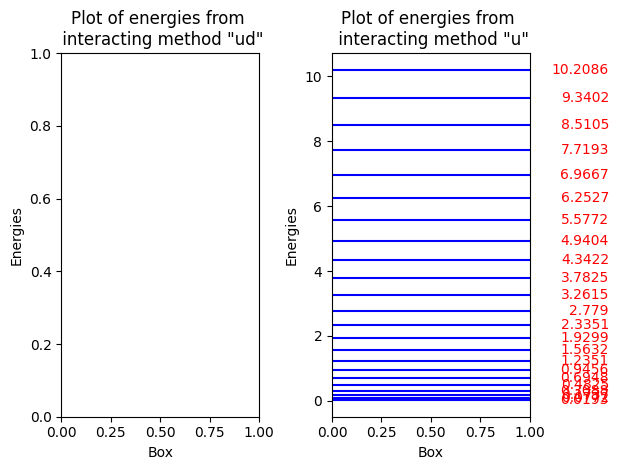

In [6]:
# plot the energies

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
for i, value in enumerate(energies_int):
    ax1.axhline(y=value, color='b', linestyle='-')
    if energies_int[i] == energies_int[i-1]:
        ax1.text(x=1.4, y=value, s=f'{value}', color='black', va='center', ha='right')
    else:
        ax1.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')

for i, value in enumerate(energies_single):
    ax2.axhline(y=value, color='b', linestyle='-')
    ax2.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')


ax1.set_title('Plot of energies from \n interacting method "ud"')
ax2.set_title('Plot of energies from \n interacting method "u"')
ax1.set_xlabel("Box")
ax1.set_ylabel("Energies")
ax2.set_xlabel("Box")
ax2.set_ylabel("Energies")
plt.tight_layout()
plt.show()

In [7]:

# occupied-info[state][0: up_occ_index, 1: down_occ_index, 2: orbital_energy, 3: energy_sum]

# Function to update the plot
def update_plot(k):
    plt.figure(figsize=(3, 4))
    plt.clf()

    # Plot horizontal lines and text for each value in energies_single
    for i, value in enumerate(energies_single):
        plt.axhline(y=value, color='b', linestyle='-')
        plt.text(x=(l+0.3), y=value, s=f'{value}', color='red', va='center', ha='right')
    
    if occupied_info[k][2][0] == occupied_info[k][2][1]:
        plt.plot(0.25, occupied_info[k][2][0], "ro")
        plt.plot(0.75, occupied_info[k][2][1], "go")
    else:
        plt.plot(0.5, occupied_info[k][2][0], "ro")
        plt.plot(0.5, occupied_info[k][2][1], "go")

    plt.xlim(0, 1)
    plt.ylim(min(energies_single) - 1, max(energies_single) + 1)
    plt.title("k-state occupation, up=red, down=green")
    
    plt.show()

# Create a slider widget
k_slider = widgets.IntSlider(value=5, min=0, max=len(occupied_info) - 1, step=1, description='k:')

# Update the plot when the slider value changes
widgets.interact(update_plot, k=k_slider)

# Display the slider
display(k_slider)


interactive(children=(IntSlider(value=5, description='k:', max=22), Output()), _dom_classes=('widget-interact'…

IntSlider(value=5, description='k:', max=22)